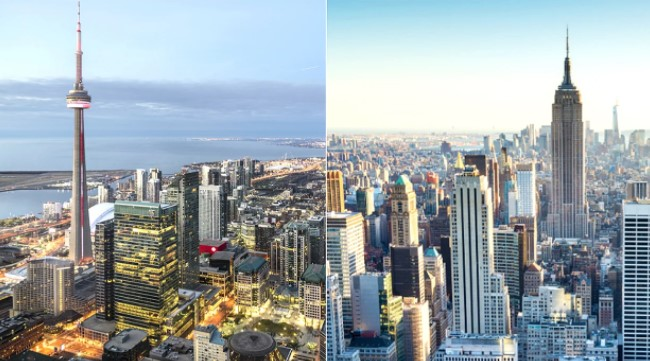

# <center>The battle of neighborhoods - office in Toronto</center>

## 1. Introduction.

### 1.1 Background

As reported by Wikipedia, New York is the most populous city in the United States <a href='#1'>[1]</a>. Its population in 2020  was estimated as 8,253,213 people. What is important New York City is also the most densely populated major city in the United State (more than 27 thousand people per square kilometer). As one of the most important cities of the United States and even the whole world, New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports.


The second, undoubtedly interesting city in North America, is Toronto. Toronto is the capital city of the Canadian province of Ontario. As Wikipedia says <a href='#2'>[2]</a> with a recorded population of 2,731,571 in 2016, it is the most populous city in Canada and the fourth most populous city in North America. Toronto is a prominent centre for music, theatre, motion picture production, and television production. Its varied cultural institutions with numerous museums and galleries, festivals and public events, entertainment districts, national historic sites, and sports activities.


As we can see from this encyclopaedic review, both cities are quite large and have many common features. The common features of both cities certainly include <a href='#3'>[3]</a>:


* Both are the biggest cities in their respective countries.
* Both are the financial capitals in their respective countries.
* Both are the most crowded cities in their respective countries.
* Both cities have similar weather.
* Both cities are safe.
* Both cities are entertainment centers and big on the arts.


However, according to ranking Best Places to Live in North America <a href='#4'>[4]</a> Toronto seems to be better place to live - in the mentioned ranking Toronto is ranked on the first place, while New York is eighteenth.

### 1.2 Problem

My client, Data-X Co., is considering relocating its business from today's location in New York to Toronto. He confirmed the fact that most of its employees have expressed such a desire (will move to Toronto with the company). Generally, all believe that with all the similarities between cities, Toronto is a bit less crowded and will be easier to maintain a work-life balance. As everyone appreciated the previous location in terms of available attractions the client wants to move the office to similar, nice place if it is possible.


The problem comes down to answering the question:


**Where would I recommend to open the new office taking into account similarity of the new and old location (venues availability)?**


### 1.3 Interest

In the era of high mobility of employees, striving to improve the quality of life by employees, looking for work-life balance but also seeking lower costs of running a business, finding the answer on asked question can be interesting for  a large group of entrepreneurs who want to move their headquarters to other countries or open new offices in new location with certain factors unchanging.


## 2. Data



### 2.1 Data sources

For the project I will use the following data:

* <p>Toronto City data that contains Borough, Neighborhoods</p> 
	<p><strong>Data Source:</strong> <a href="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M">Wikipedia</a></p>
	<strong>Description:</strong> The Wikipedia site contain all the information I need to explore and cluster the neighbourhoods in Toronto. I will scrape the Wikipedia page using pandas package,  clean it, and then read it into a pandas data frame.


* <p>Geographical Location data using Geocoder Package</p>
	<p><strong>Data Source:</strong></p> 
		<p>for API: <a href="https://cocl.us/Geospatial_data">https://cocl.us/Geospatial_data</a></p> 
		<p>for latitudes and longitudes of Toronto: <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv">Geospatial_Coordinates.csv</a>
    </p>
	<p><strong>Description:</strong> The second source of data was provided with the Geographical coordinates of the neighbourhoods with the Postal Codes of Toronto. I will combine the above data with latitudes and longitudes of Toronto's neighbourhoods.</p>

* <p>New York data that contains Borough, Neighbourhoods, latitude and longitude</p>
	<p><strong>Data Source:</strong> <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json"> newyork_data.json</a></p>
    <strong>Description:</strong> The third source of data was provided with the Geographical coordinates of the neighbourhoods of NY. I will transform the json file into pandas data frame. Both data (NY and Toronto) I will use to find venues of each locations.


* <p>Venue Data using Foursquare API
	<p><strong>Data Source:</strong> <a href="https://foursquare.com/developers/apps">https://foursquare.com/developers/apps</a></p>
	<strong>Description:</strong> From Foursquare API we can get the name, category, latitude, longitude for each venue. Then  I will this feature to group the neighbourhoods into clusters. I will use the k-means clustering algorithm to complete the task. Finally, I will also use the Folium library to visualize the neighbourhoods in Toronto and their emerging clusters.


### 2.2 Data aquisition and cleaning

#### 2.2.1 Downloading and Exploring Toronto Dataset

To download the data from Wikipedia I use pandas library.
First, let's import needed libraries and conect to url: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [1]:
#First I will import all basic packages and download the Wikipedia page

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_toronto = pd.read_html(url)

Libraries imported.


Object df_toronto is a list with lenght 3:

In [2]:
print('Object type ',type(df_toronto))
print('Object lenght ', len(df_toronto))

Object type  <class 'list'>
Object lenght  3


Object df_toronto is a list with lenght 3. I'm looking fo a table with postal codes, borough and neighborhood. Let's see the first table:

In [3]:
df_toronto[0].head()

0                1  \
0                                    M1ANot assigned  M2ANot assigned   
1                    M1BScarborough(Malvern / Rouge)  M2BNot assigned   
2  M1CScarborough(Rouge Hill / Port Union / Highl...  M2CNot assigned   
3  M1EScarborough(Guildwood / Morningside / West ...  M2ENot assigned   
4                             M1GScarborough(Woburn)  M2GNot assigned   

                                                2  \
0                        M3ANorth York(Parkwoods)   
1                   M3BNorth York(Don Mills)North   
2  M3CNorth York(Don Mills)South(Flemingdon Park)   
3                                 M3ENot assigned   
4                                 M3GNot assigned   

                                                3  \
0                 M4ANorth York(Victoria Village)   
1  M4BEast York(Parkview Hill / Woodbine Gardens)   
2                  M4CEast York(Woodbine Heights)   
3                    M4EEast Toronto(The Beaches)   
4                           M4GEast York(Leaside)   

                                                 4  \
0  M5ADowntown Toronto(Regent Park / Harbourfront)   
1    M5BDowntown Toronto(Garden District, Ryerson)   
2              M5CDowntown Toronto(St. James Town)   
3                 M5EDowntown Toronto(Berczy Park)   
4          M5GDowntown Toronto(Central Bay Street)   

                                                  5  \
0  M6ANorth York(Lawrence Manor / Lawrence Heights)   
1                          M6BNorth York(Glencairn)   
2                       M6CYork(Humewood-Cedarvale)   
3                      M6EYork(Caledonia-Fairbanks)   
4                     M6GDowntown Toronto(Christie)   

                                                6                7  \
0  M7AQueen's Park(Ontario Provincial Government)  M8ANot assigned   
1                                 M7BNot assigned  M8BNot assigned   
2                                 M7CNot assigned  M8CNot assigned   
3                                 M7ENot assigned  M8ENot assigned   
4                                 M7GNot assigned  M8GNot assigned   

                                                   8  
0                     M9AEtobicoke(Islington Avenue)  
1  M9BEtobicoke(West Deane Park / Princess Garden...  
2  M9CEtobicoke(Eringate / Bloordale Gardens / Ol...  
3                                    M9ENot assigned  
4                                    M9GNot assigned

Let's check the shape of the frame:

In [4]:
df_toronto[0].shape

(20, 9)

My target table will be constructed from df_toronto[0] by reading each column and concatenate it below existing one.

In [5]:
#creation of pandas dataframe with first coulmn of df_toronto[0]
df_onecolumn = pd.DataFrame(df_toronto[0][0])
#giving a name to column
df_onecolumn.columns =['One_column']
#reading and concatenating next columns
for i in range(1,9):
    dfx=pd.DataFrame(df_toronto[0][i])
    dfx.columns =['One_column']
    #dfx.reset_index(drop=True, inplace=True)
    df_onecolumn = pd.concat([df_onecolumn, dfx], ignore_index=True)
df_onecolumn

One_column
0                                      M1ANot assigned
1                      M1BScarborough(Malvern / Rouge)
2    M1CScarborough(Rouge Hill / Port Union / Highl...
3    M1EScarborough(Guildwood / Morningside / West ...
4                               M1GScarborough(Woburn)
5                            M1HScarborough(Cedarbrae)
6                  M1JScarborough(Scarborough Village)
7    M1KScarborough(Kennedy Park / Ionview / East B...
8    M1LScarborough(Golden Mile / Clairlea / Oakridge)
9    M1MScarborough(Cliffside / Cliffcrest / Scarbo...
10        M1NScarborough(Birch Cliff / Cliffside West)
11   M1PScarborough(Dorset Park / Wexford Heights /...
12                  M1RScarborough(Wexford / Maryvale)
13                           M1SScarborough(Agincourt)
14   M1TScarborough(Clarks Corners / Tam O'Shanter ...
15   M1VScarborough(Milliken / Agincourt North / St...
16      M1WScarborough(Steeles West / L'Amoreaux West)
17                         M1XScarborough(Upper Rouge)
18                                     M1YNot assigned
19                                     M1ZNot assigned
20                                     M2ANot assigned
21                                     M2BNot assigned
22                                     M2CNot assigned
23                                     M2ENot assigned
24                                     M2GNot assigned
25                    M2HNorth York(Hillcrest Village)
26       M2JNorth York(Fairview / Henry Farm / Oriole)
27                      M2KNorth York(Bayview Village)
28            M2LNorth York(York Mills / Silver Hills)
29             M2MNorth York(Willowdale / Newtonbrook)
30                      M2NNorth York(Willowdale)South
31                      M2PNorth York(York Mills West)
32                       M2RNorth York(Willowdale)West
33                                     M2SNot assigned
34                                     M2TNot assigned
35                                     M2VNot assigned
36                                     M2WNot assigned
37                                     M2XNot assigned
38                                     M2YNot assigned
39                                     M2ZNot assigned
40                            M3ANorth York(Parkwoods)
41                       M3BNorth York(Don Mills)North
42      M3CNorth York(Don Mills)South(Flemingdon Park)
43                                     M3ENot assigned
44                                     M3GNot assigned
45   M3HNorth York(Bathurst Manor / Wilson Heights ...
46     M3JNorth York(Northwood Park / York University)
47          M3KNorth York(Downsview)East (CFB Toronto)
48                        M3LNorth York(Downsview)West
49                     M3MNorth York(Downsview)Central
50                   M3NNorth York(Downsview)Northwest
51                                     M3PNot assigned
52                                     M3RNot assigned
53                                     M3SNot assigned
54                                     M3TNot assigned
55                                     M3VNot assigned
56                                     M3WNot assigned
57                                     M3XNot assigned
58                                     M3YNot assigned
59                                     M3ZNot assigned
60                     M4ANorth York(Victoria Village)
61      M4BEast York(Parkview Hill / Woodbine Gardens)
62                      M4CEast York(Woodbine Heights)
63                        M4EEast Toronto(The Beaches)
64                               M4GEast York(Leaside)
65                      M4HEast York(Thorncliffe Park)
66         M4JEast YorkEast Toronto(The Danforth East)
67      M4KEast Toronto(The Danforth West / Riverdale)
68    M4LEast Toronto(India Bazaar / The Beaches West)
69                    M4MEast Toronto(Studio District)
70                   M4NCentral Toronto(Lawrence Park)
71                M4PCentral Toronto(Davisville North)
72              M4RCentral To

Let's create all needed columns:

In [6]:
df_onecolumn["Postal Code"] = np.nan
df_onecolumn["Delete"] = np.nan
df_onecolumn["Borough"] = np.nan
df_onecolumn["Neighborhood"] = np.nan

Now I will fulfill all columns with proper data from column named 'One_column':

In [7]:
#Fulfilling Postal Code column with 3 first characters from One_column
for i in range(180):
    postal_code=df_onecolumn.loc[i,'One_column']
    df_onecolumn.loc[i,"Postal Code"]=postal_code[:3]
    
#Fulfilling Delete column with 15 next chatacters from One_colum. 
#The column Delet will be used to delete all "Not assigned" codes. 
    delete_column=df_onecolumn.loc[i,'One_column']
    df_onecolumn.loc[i,"Delete"]=delete_column[3:15]

df_onecolumn = df_onecolumn[df_onecolumn['Delete'] != 'Not assigned']

df_onecolumn=df_onecolumn.reset_index()
df_onecolumn = df_onecolumn.drop(['index'], axis=1)

for i in range(df_onecolumn.shape[0]):
    #print(i)
    a=df_onecolumn.loc[i,'One_column']
    #print(a)
    a=a[3:]
    #print(a)
    b=a.split("(")[1]
    #print(b)
    a=a.split("(")[0]
    #print(a)
    df_onecolumn.loc[i,"Borough"]=a
    df_onecolumn.loc[i,"Neighborhood"]=b

df_onecolumn = df_onecolumn.drop(['Delete'], axis=1)

for i in range(df_onecolumn.shape[0]):
    a=df_onecolumn.loc[i,'Neighborhood']
    a=a.split(")")[0]
    a=a.replace(" / ",", ")
    
    df_onecolumn.loc[i,"Neighborhood"]=a

In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

Let's see the result of the prevous actions:

In [9]:
df_onecolumn.head()

One_column Postal Code      Borough  \
0                    M1BScarborough(Malvern / Rouge)         M1B  Scarborough   
1  M1CScarborough(Rouge Hill / Port Union / Highl...         M1C  Scarborough   
2  M1EScarborough(Guildwood / Morningside / West ...         M1E  Scarborough   
3                             M1GScarborough(Woburn)         M1G  Scarborough   
4                          M1HScarborough(Cedarbrae)         M1H  Scarborough   

                             Neighborhood  
0                          Malvern, Rouge  
1  Rouge Hill, Port Union, Highland Creek  
2       Guildwood, Morningside, West Hill  
3                                  Woburn  
4                               Cedarbrae

Just to be sure that everything went fine, I like to export dataframe to csv file and analyze it.

In [10]:
df_onecolumn.to_csv(r'H:\GitHub\Coursera_Capstone\final_reports\data\df_onecolumn.csv', header=None, index=None, sep=';', mode='a')

In the file I saw that 5 rows have not very nice text in Borough column and should be modify:

In [11]:
options = ['M4J','M5W','M7R','M7Y','M9W']
df_onecolumn[df_onecolumn['Postal Code'].isin(options)]

One_column Postal Code  \
40         M4JEast YorkEast Toronto(The Danforth East)         M4J   
69   M5WDowntown TorontoStn A PO Boxes25 The Esplan...         M5W   
86   M7RMississaugaCanada Post Gateway Processing C...         M7R   
87   M7YEast TorontoBusiness reply mail Processing ...         M7Y   
102  M9WEtobicokeNorthwest(Clairville / Humberwood ...         M9W   

                                               Borough  \
40                               East YorkEast Toronto   
69      Downtown TorontoStn A PO Boxes25 The Esplanade   
86    MississaugaCanada Post Gateway Processing Centre   
87   East TorontoBusiness reply mail Processing Cen...   
102                                 EtobicokeNorthwest   

                                          Neighborhood  
40                                   The Danforth East  
69                                      Enclave of M5E  
86                                      Enclave of L4W  
87                                      Enclave of M4L  
102  Clairville, Humberwood, Woodbine Downs, West H...

In the code below I will:
* add the space between East York and East Toronto for M4J
* change Borough and Neighborhood to Downtown Toronto for M5W
* change Borough and Neighborhood to Mississauga for M5W
* change Borough and Neighborhood to East Toronto for M7Y
* add the space between Etobicoke and Northwest for M9W
* delete One_column

In [12]:
a = df_onecolumn.loc[40,'Borough']
a=a.replace("YorkEast","York East")
df_onecolumn.loc[40,'Borough']=a

a='Downtown Toronto'
df_onecolumn.loc[69,'Borough']=a
df_onecolumn.loc[69,'Neighborhood']=a

a='Mississauga'
df_onecolumn.loc[86,'Borough']=a
df_onecolumn.loc[86,'Neighborhood']=a

a='East Toronto'
df_onecolumn.loc[87,'Borough']=a
df_onecolumn.loc[87,'Neighborhood']=a

a = df_onecolumn.loc[102,'Borough']
a=a.replace("EtobicokeNorthwest","Etobicoke Northwest")
df_onecolumn.loc[102,'Borough']=a

df_onecolumn = df_onecolumn.drop(['One_column'], axis=1)

df_onecolumn

Postal Code                 Borough  \
0           M1B             Scarborough   
1           M1C             Scarborough   
2           M1E             Scarborough   
3           M1G             Scarborough   
4           M1H             Scarborough   
5           M1J             Scarborough   
6           M1K             Scarborough   
7           M1L             Scarborough   
8           M1M             Scarborough   
9           M1N             Scarborough   
10          M1P             Scarborough   
11          M1R             Scarborough   
12          M1S             Scarborough   
13          M1T             Scarborough   
14          M1V             Scarborough   
15          M1W             Scarborough   
16          M1X             Scarborough   
17          M2H              North York   
18          M2J              North York   
19          M2K              North York   
20          M2L              North York   
21          M2M              North York   
22          M2N              North York   
23          M2P              North York   
24          M2R              North York   
25          M3A              North York   
26          M3B              North York   
27          M3C              North York   
28          M3H              North York   
29          M3J              North York   
30          M3K              North York   
31          M3L              North York   
32          M3M              North York   
33          M3N              North York   
34          M4A              North York   
35          M4B               East York   
36          M4C               East York   
37          M4E            East Toronto   
38          M4G               East York   
39          M4H               East York   
40          M4J  East York East Toronto   
41          M4K            East Toronto   
42          M4L            East Toronto   
43          M4M            East Toronto   
44          M4N         Central Toronto   
45          M4P         Central Toronto   
46          M4R         Central Toronto   
47          M4S         Central Toronto   
48          M4T         Central Toronto   
49          M4V         Central Toronto   
50          M4W        Downtown Toronto   
51          M4X        Downtown Toronto   
52          M4Y        Downtown Toronto   
53          M5A        Downtown Toronto   
54          M5B        Downtown Toronto   
55          M5C        Downtown Toronto   
56          M5E        Downtown Toronto   
57          M5G        Downtown Toronto   
58          M5H        Downtown Toronto   
59          M5J        Downtown Toronto   
60          M5K        Downtown Toronto   
61          M5L        Downtown Toronto   
62          M5M              North York   
63          M5N         Central Toronto   
64          M5P         Central Toronto   
65          M5R         Central Toronto   
66          M5S        Downtown Toronto   
67          M5T        Downtown Toronto   
68          M5V        Downtown Toronto   
69          M5W        Downtown Toronto   
70          M5X        Downtown Toronto   
71          M6A              North York   
72          M6B              North York   
73          M6C                    York   
74          M6E                    York   
75          M6G        Downtown Toronto   
76          M6H            West Toronto   
77          M6J            West Toronto   
78          M6K            West Toronto   
79          M6L              North York   
80          M6M                    York   
81          M6N                    York   
82          M6P            West Toronto   
83          M6R            West Toronto   
84          M6S            West Toronto   
85          M7A            Queen's Park   
86          M7R             Mississauga   
87          M7Y            East Toronto   
88          M8V               Etobicoke   
89          M8W               Etobicoke   
90          M8X               Etobicoke   
91          M8Y               Etobicoke   
92   

Let's see again the lines mentioned abow:

In [13]:
options = ['M4J','M5W','M7R','M7Y','M9W']
df_onecolumn[df_onecolumn['Postal Code'].isin(options)]

Postal Code                 Borough  \
40          M4J  East York East Toronto   
69          M5W        Downtown Toronto   
86          M7R             Mississauga   
87          M7Y            East Toronto   
102         M9W     Etobicoke Northwest   

                                          Neighborhood  
40                                   The Danforth East  
69                                    Downtown Toronto  
86                                         Mississauga  
87                                        East Toronto  
102  Clairville, Humberwood, Woodbine Downs, West H...

df_onecolumn was my working dataframe that's why I will create the final table named df_Toronto:

In [14]:
df_Toronto = df_onecolumn

In [15]:
df_Toronto.head()

Postal Code      Borough                            Neighborhood
0         M1B  Scarborough                          Malvern, Rouge
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
2         M1E  Scarborough       Guildwood, Morningside, West Hill
3         M1G  Scarborough                                  Woburn
4         M1H  Scarborough                               Cedarbrae

Now I will save the df_Toronto locally:

In [16]:
df_Toronto.to_csv(r'H:\GitHub\Coursera_Capstone\final_reports\data\df_Toronto.csv', header=None, index=None, sep=';', mode='a')

Now, in the next fiew lines of code I will join neighborhood table with latitude and longitude information provided within the project.

First I will create a dataframe of the latitude and longitudes of the Toronto Neighborhoods from the file provided by Coursera

In [17]:
df_coordinates = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
df_coordinates.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

Now let's add column Latitude and Longitude to the table df_Toronto

In [18]:
df_Toronto.set_index("Postal Code")
df_coordinates.set_index("Postal Code")
df_Toronto=pd.merge(df_Toronto, df_coordinates)
df_Toronto.head()

Postal Code      Borough                            Neighborhood   Latitude  \
0         M1B  Scarborough                          Malvern, Rouge  43.806686   
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2         M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3         M1G  Scarborough                                  Woburn  43.770992   
4         M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

The basic table of location in Toronto is ready.

#### 2.2.2 Adding the New York data to basic Dataset

And now an important moment has come: I will add one additional row to the table with Borough and Neighborhood of my client adress. It will allow me to cluster the address toghether with Toronto data: 

<b>Borough:</b> Manhattan
<br><b>Neighborhood:</b> Marble Hill
<br><b>Latitude:</b> 40.876551
<br><b>Longitude:</b> -73.910660

In [19]:
new_row = {'Postal Code':'XXX', 'Borough':'Manhattan', 'Neighborhood':'Marble Hill', 'Latitude':40.876551, 'Longitude':-73.910660 }
#append row to the dataframe
df_Toronto = df_Toronto.append(new_row, ignore_index=True)

In [20]:
df_Toronto.to_csv(r'H:\GitHub\Coursera_Capstone\final_reports\data\df_Toronto2.csv', header=None, index=None, sep=';', mode='a')

In [21]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_Toronto['Borough'].unique()),
        df_Toronto.shape[0]
    )
)

The dataframe has 14 boroughs and 104 neighborhoods.


#### 2.2.3 Presentation of the locations on a map.

I will use now geopy library to get the latitude and longitude values of Toronto.

In [9]:
pip install geopy 

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [22]:
import geopy
from geopy.geocoders import Nominatim
import requests # library to handle requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # map rendering library

In [23]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Create a map of Toronto with neighborhoods superimposed on top.

In [24]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Toronto['Latitude'], df_Toronto['Longitude'], df_Toronto['Borough'], df_Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Let's see also where the NY location is on the map:

In [25]:
map_nyc = folium.Map(location=[40.876551, -73.910660], zoom_start=17)

# add markers to map
#for lat, lng, borough in zip(40.876551, -73.910660, '0'):
label = '{}'.format(borough)
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
        [40.876551, -73.910660],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  

map_nyc

#### 2.2.4 Data acquisition from Foursquare

Let's define Foursquare Credentials:

In [26]:
CLIENT_ID = 'FSMODMJOHONN25W1K2ARWFTBUYQCUFGFRWVD0N5KQ1L4U0IE' # your Foursquare ID
CLIENT_SECRET = 'V04RUN5XDJ4HF0QOIPTVGB2GG2LLO2FHGNBPZOLXVW1RYYC4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FSMODMJOHONN25W1K2ARWFTBUYQCUFGFRWVD0N5KQ1L4U0IE
CLIENT_SECRET:V04RUN5XDJ4HF0QOIPTVGB2GG2LLO2FHGNBPZOLXVW1RYYC4


Let's create a function to explore the near by venues by given latitudes, longitudes and radius 750 m. We will use this function on our df_Toronto dataframe.

In [27]:
 def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
Toronto_venues = getNearbyVenues(names=df_Toronto['Neighborhood'],
                                   latitudes=df_Toronto['Latitude'],
                                   longitudes=df_Toronto['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale
York Mills West
Willowdale
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
The Danforth East
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawre

It's important to remember that Marble Hill is also a part of the data.

 Let's check the size of the resulting dataframe

In [29]:
print(Toronto_venues.shape)
Toronto_venues.head()

(3717, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Malvern, Rouge              43.806686              -79.194353   
1  Malvern, Rouge              43.806686              -79.194353   
2  Malvern, Rouge              43.806686              -79.194353   
3  Malvern, Rouge              43.806686              -79.194353   
4  Malvern, Rouge              43.806686              -79.194353   

                 Venue  Venue Latitude  Venue Longitude  \
0   Images Salon & Spa       43.802283       -79.198565   
1              Wendy’s       43.807448       -79.199056   
2              Wendy's       43.802008       -79.198080   
3  Staples Morningside       43.800285       -79.196607   
4           Lee Valley       43.803161       -79.199681   

                  Venue Category  
0                            Spa  
1           Fast Food Restaurant  
2           Fast Food Restaurant  
3  Paper / Office Supplies Store  
4                     Hobby Shop

In [30]:
Toronto_venues.tail()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
3712  Marble Hill              40.876551               -73.91066   
3713  Marble Hill              40.876551               -73.91066   
3714  Marble Hill              40.876551               -73.91066   
3715  Marble Hill              40.876551               -73.91066   
3716  Marble Hill              40.876551               -73.91066   

                            Venue  Venue Latitude  Venue Longitude  \
3712          Ray's Pizza Express       40.878901       -73.916558   
3713   Caridad Spanish Restaurant       40.871832       -73.906700   
3714    Dick Savitt Tennis Center       40.873845       -73.917391   
3715  MTA Bx7 Bx20 - 218th & Bway       40.870979       -73.914778   
3716            Elsa's Hair Salon       40.871959       -73.904651   

          Venue Category  
3712         Pizza Place  
3713  Spanish Restaurant  
3714        Tennis Court  
3715         Bus Station  
3716  Salon / Barbershop

Let's check how many venues were returned for each neighborhood

In [35]:
stats = Toronto_venues.groupby('Neighborhood').count()

In [39]:
stats

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                              14   
Alderwood, Long Branch                                                 12   
Bathurst Manor, Wilson Heights, Downsview North                        25   
Bayview Village                                                        10   
Bedford Park, Lawrence Manor East                                      36   
Berczy Park                                                           100   
Birch Cliff, Cliffside West                                             8   
Brockton, Parkdale Village, Exhibition Place                           83   
CN Tower, King and Spadina, Railway Lands, Harb...                     25   
Caledonia-Fairbanks                                                    12   
Cedarbrae                                                              20   
Central Bay Street                                                    100   
Christie                                                               31   
Church and Wellesley                                                  100   
Clairville, Humberwood, Woodbine Downs, West Hu...                      2   
Clarks Corners, Tam O'Shanter, Sullivan                                23   
Cliffside, Cliffcrest, Scarborough Village West                         5   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             75   
Davisville North                                                       30   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        7   
Don Mills                                                              36   
Dorset Park, Wexford Heights, Scarborough Town ...                     14   
Downsview                                                              38   
Downtown Toronto                                                      100   
Dufferin, Dovercourt Village                                           33   
East Toronto                                                           50   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                     12   
Fairview, Henry Farm, Oriole                                           38   
First Canadian Place, Underground city                                100   
Forest Hill North & West                                                5   
Garden District, Ryerson                                              100   
Glencairn                                                              18   
Golden Mile, Clairlea, Oakridge                                        15   
Guildwood, Morningside, West Hill                                      11   
Harbourfront East, Union Station, Toronto Islands                      98   
High Park, The Junction South                                          63   
Hillcrest Village                                                      13   
Humber Summit                                                           4   
Humberlea, Emery                                                        6   
Humewood-Cedarvale                                                     15   
India Bazaar, The Beaches West                                         53   
Islington Avenue                                                        9   
Kennedy Park, Ionview, East Birchmount Park                            15   
Kensington Market, Chinatown, Grange Park                             100   
Kingsview Village, St. Phillips, Martin Grove G...                     12   
Lawrence Manor, Lawrence Heights                                       34   
Lawrence Park                                                           6   
Leaside                                                                50   
Little Portugal, Trinity                                              100   
Malvern, Rouge                                  

We get pandas dataframe:

In [40]:
type(stats)

pandas.core.frame.DataFrame

In [64]:
stats.shape

(98, 6)

Let's see the bar graph which will present us a number of venues per neighborhood.

In [80]:
venues_graph = stats['Venue'].tolist()

In [81]:
Neighborhood_graph = stats.index.tolist()

In [117]:
newlst=[]
for i in Neighborhood_graph:
    newlst.append(i[:10])

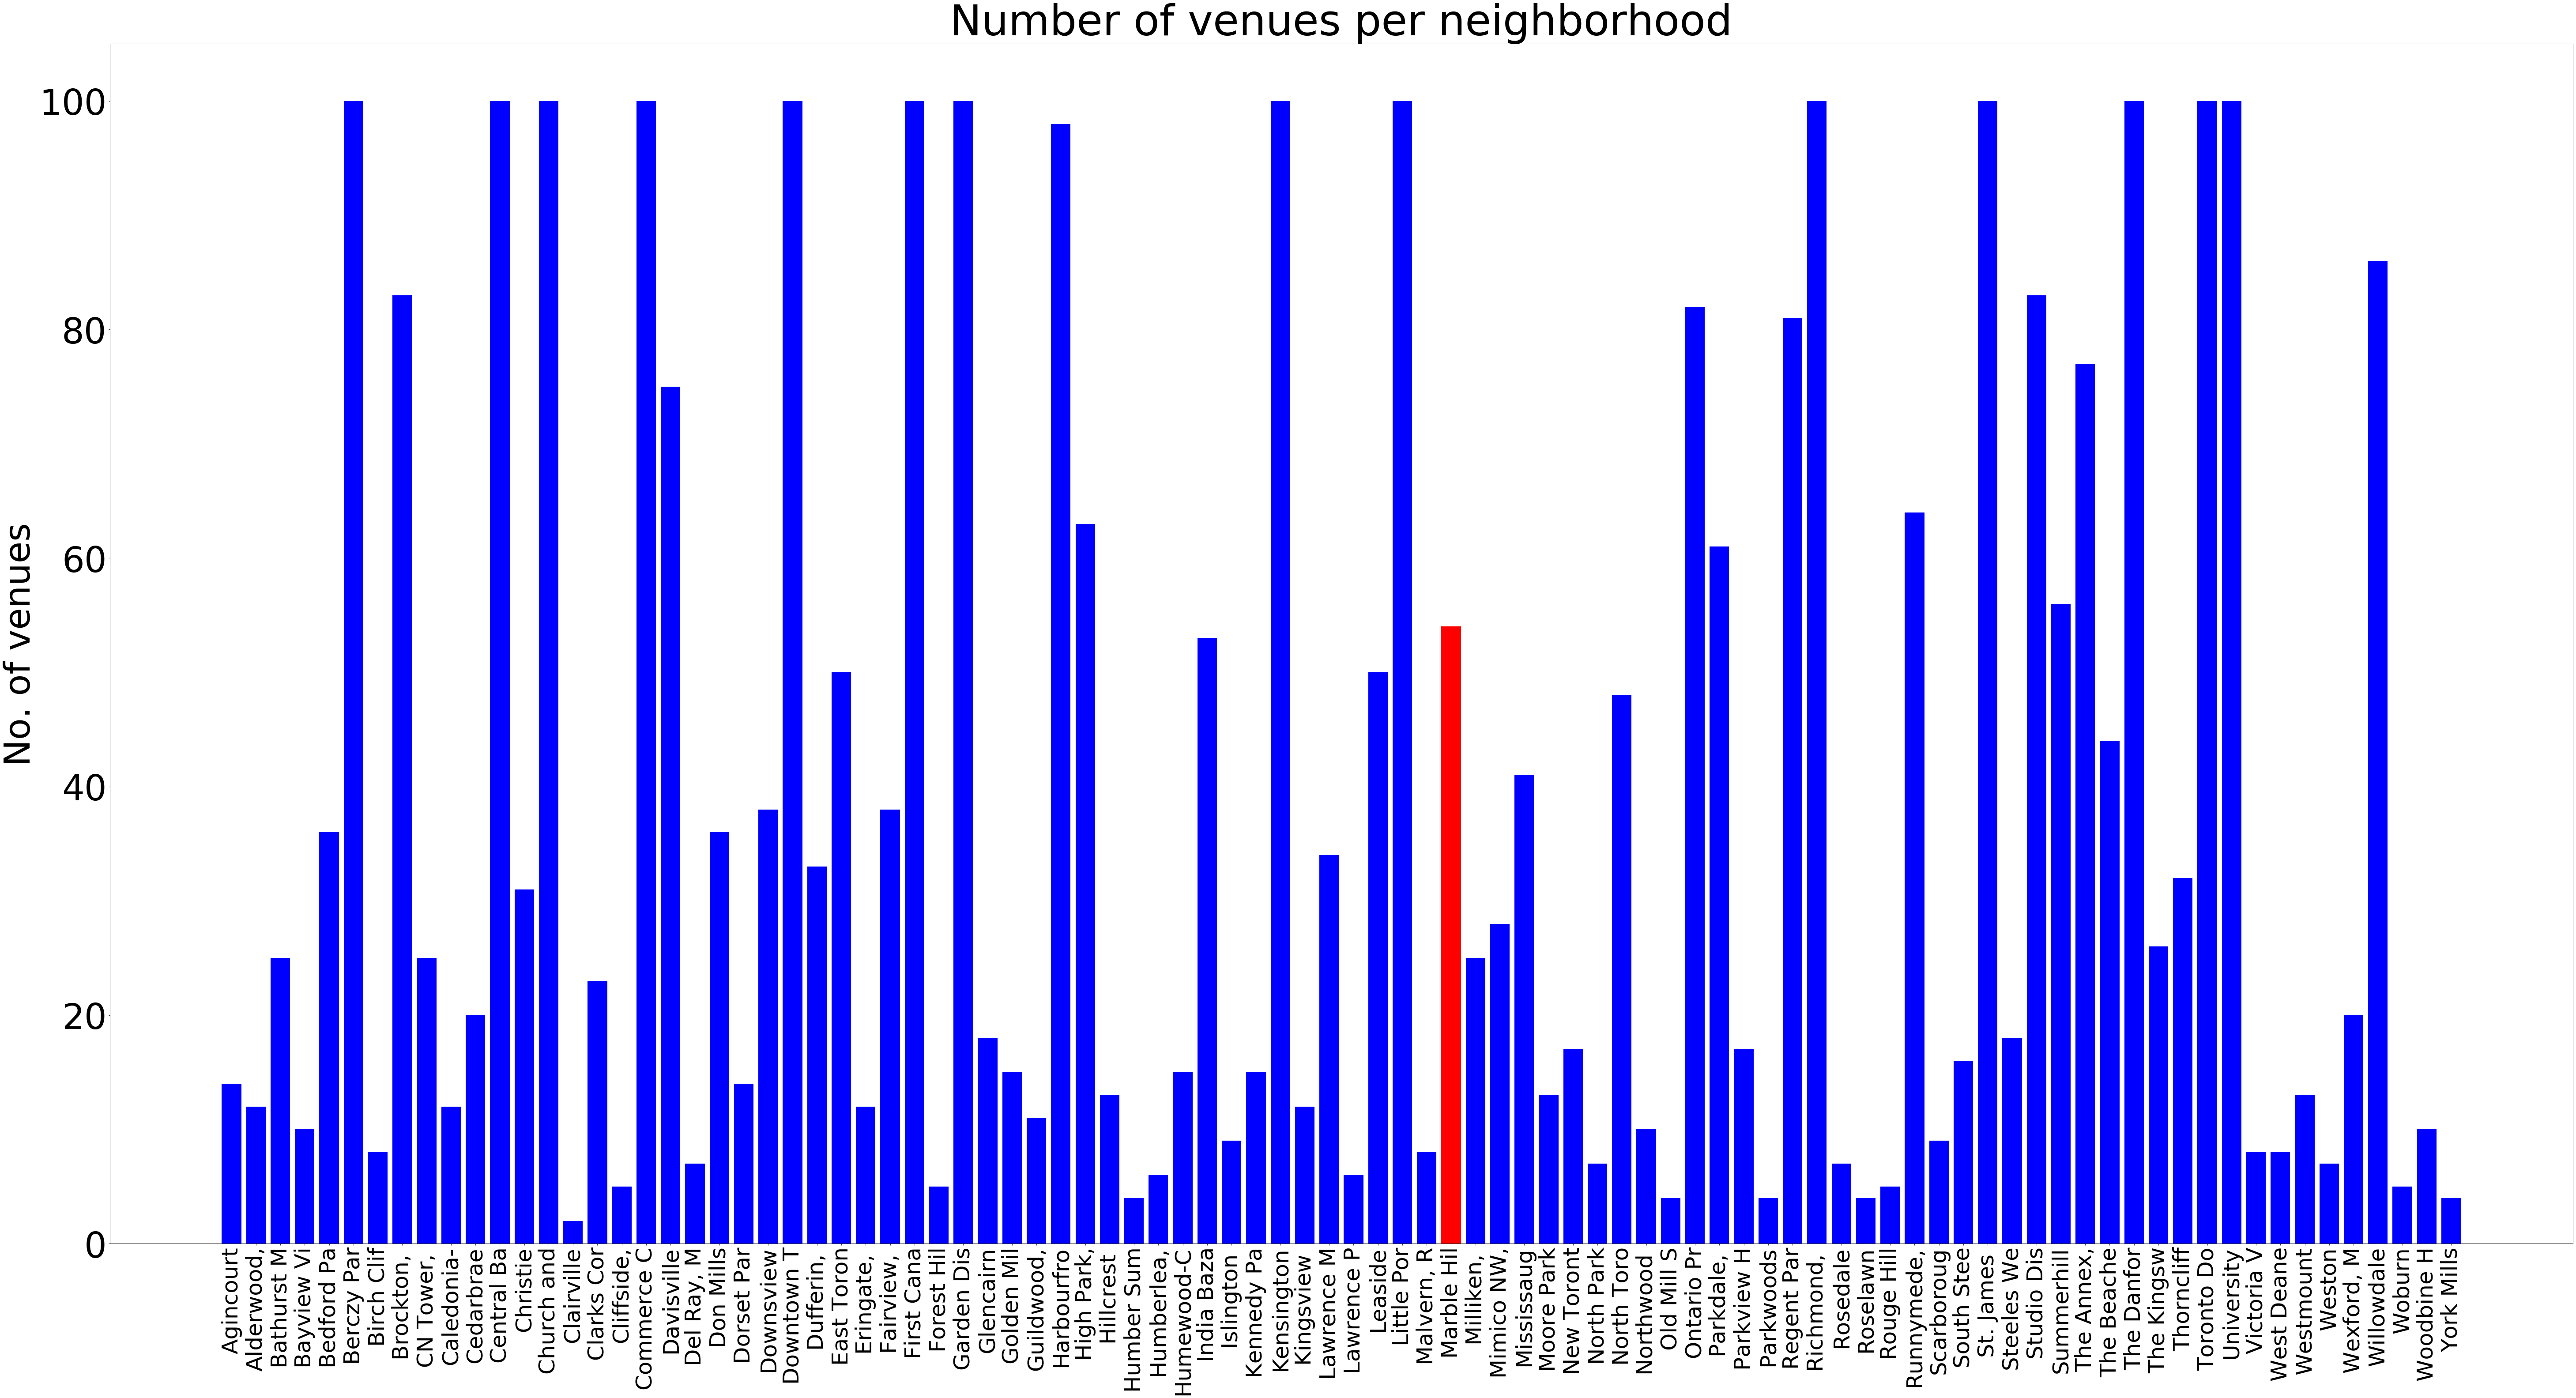

In [138]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 80})  
fig = plt.figure(figsize = (100, 50))

 
# creating the bar plot
plt.bar(newlst, venues_graph, color ='blue',
        width = 0.8, alpha=1)
#highlighting Marble Hill
plt.bar([50], [54], color ='red',
        width = 0.8, alpha=1)
#plt.xlabel("")
plt.ylabel("No. of venues")
plt.title("Number of venues per neighborhood")
plt.xticks(fontsize=50,rotation=90)

plt.show()

As we can see from the chart, for Marble Hill we have 54 Venues and that is roughly halfway in the 0-100 range.

Let's find out how many unique categories can be curated from all the returned venues


In [123]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 327 uniques categories.


## 3. Methodology 

In this paper I will try to detect areas of Toronto which are similar to the area of my **client's office - Marble Hill**. For data clustering I will use **max number of venues equal to 100** and **radius of exploration equal to 750 meters** (as shown in the previous paragraph).

In first step I **have collected** the required data: Toronto locations with one New York locations and the list with types of avaiable venues (with usage of Foursquare categorization).

Next, I will group rows by neighborhood and I will take the mean of the frequency of occurrence of each category in the neighborhood. This data I will use to cluster the locations. **The clustering** is the grouping of a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups (clusters). In this case the similarity will be done on the venues in given locations.

In a third step I will **check the top 10 most common venues** for all locations and I will compare it with to the Marble Hill most common venues. It will allows me to get the first feeling if I can use the clustering or not.

In fourth step **I will cluster neighborhoods**: I will use **k-means clustering**. But before I will find the best K value using **the Elbow Point method**. 

In the last step I will **examine each cluster** and the I will focus on cluster with Merble Hill location. I will also **visualize** the cluster where Marble Hill belongs to.  The visualisation should be a starting point for final decision of the client to exploration and search for optimal venue location for the new office.



### 3.1 Analysis of each neighborhood

Let's start the analysis with one hot encoding:

In [139]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

Toronto_onehot.head()

Accessories Store  Adult Boutique  Afghan Restaurant  Airport  \
0                  0               0                  0        0   
1                  0               0                  0        0   
2                  0               0                  0        0   
3                  0               0                  0        0   
4                  0               0                  0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Amphitheater  Animal Shelter  \
0                 0                    0             0               0   
1                 0                    0             0               0   
2                 0                    0             0               0   
3                 0                    0             0               0   
4                 0                    0             0               0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Dealership  Auto Garage  \
0                 0                   0                0            0   
1                 0                   0                0            0   
2                 0                   0                0            0   
3                 0                   0                0            0   
4                 0                   0                0            0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Badminton Court  \
0              0                0          0           0                0   
1              0                0          0           0                0   
2              0                0          0           0                0   
3              0                0          0           0                0   
4              0                0          0           0                0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Basketball Stadium  Beach  Beach Bar  Bed & Breakfast  \
0                 0                   0      0          0                0   
1                 0                   0      0          0                0   
2                 0                   0      0          0                0   
3                 0                   0      0          0                0   
4                 0                   0      0          0                0   

   Beer Bar  Beer Store  Belgian Restaurant  Bike Rental / Bike Share  \
0         0           0                   0                         0   
1         0           0                   0                         0   
2         0           0                   0                         0   
3         0           0                   0                         0   
4         0           0                   0                         0   

   Bike Shop  Bistro  Boat or Ferr

Let's drop 'Neighborhood column:

In [140]:
Toronto_onehot=Toronto_onehot.drop(columns=['Neighborhood'])

Let's see the shape of Toronto_onehot shape:

In [142]:
Toronto_onehot.shape

(3717, 326)

Again we will add the Neighborhood column to the data frame:

In [143]:
# add neighborhood column back to dataframe
first_column = Toronto_venues['Neighborhood'] 
Toronto_onehot.insert(0, 'Neighborhood', first_column)

Toronto_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Malvern, Rouge                  0               0                  0   
1  Malvern, Rouge                  0               0                  0   
2  Malvern, Rouge                  0               0                  0   
3  Malvern, Rouge                  0               0                  0   
4  Malvern, Rouge                  0               0                  0   

   Airport  Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0        0                   0             0               0                0   
1        0                   0             0               0                0   
2        0                   0             0               0                0   
3        0                   0             0               0                0   
4        0                   0             0               0                0   

   Airport Terminal  American Restaurant  Amphitheater  Animal Shelter  \
0                 0                    0             0               0   
1                 0                    0             0               0   
2                 0                    0             0               0   
3                 0                    0             0               0   
4                 0                    0             0               0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Dealership  Auto Garage  \
0                 0                   0                0            0   
1                 0                   0                0            0   
2                 0                   0                0            0   
3                 0                   0                0            0   
4                 0                   0                0            0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Badminton Court  \
0              0                0          0           0                0   
1              0                0          0           0                0   
2              0                0          0           0                0   
3              0                0          0           0                0   
4              0                0          0           0                0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Basketball Stadium  Beach  Beach Bar  Bed & Breakfast  \
0                 0                   0      0          0                0   
1                 0                   0      0          0                0   
2                 0                   0      0          0                0   
3                 0                   0      0          0                0   
4                 0                   0      0          0                0   

   Beer Bar  Beer Store  Belgian Restaurant  Bike Rental / Bike Share  \
0         0           0                   0                         0   
1         0           0                   0                         0   
2         0           0                   0                         0   
3         0           0                   0                         0   
4         0   

In [144]:
Toronto_onehot.shape

(3717, 327)

Number of columns has increased - new column added with success.

And we can save the data in a file:

In [146]:
Toronto_onehot.to_csv(r'H:\GitHub\Coursera_Capstone\final_reports\data\Toronto_onehot.csv', header="True", index=None, sep=';', mode='a')

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [148]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped.tail()

Neighborhood  Accessories Store  Adult Boutique  \
93   Willowdale, Newtonbrook                0.0             0.0   
94                    Woburn                0.0             0.0   
95          Woodbine Heights                0.0             0.0   
96           York Mills West                0.0             0.0   
97  York Mills, Silver Hills                0.0             0.0   

    Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
93                0.0      0.0                 0.0           0.0   
94                0.0      0.0                 0.0           0.0   
95                0.0      0.0                 0.0           0.0   
96                0.0      0.0                 0.0           0.0   
97                0.0      0.0                 0.0           0.0   

    Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
93             0.0              0.0               0.0                  0.0   
94             0.0              0.0               0.0                  0.0   
95             0.0              0.0               0.0                  0.0   
96             0.0              0.0               0.0                  0.0   
97             0.0              0.0               0.0                  0.0   

    Amphitheater  Animal Shelter  Antique Shop  Aquarium  Art Gallery  \
93           0.0             0.0           0.0       0.0          0.0   
94           0.0             0.0           0.0       0.0          0.0   
95           0.0             0.0           0.0       0.0          0.0   
96           0.0             0.0           0.0       0.0          0.0   
97           0.0             0.0           0.0       0.0          0.0   

    Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
93         0.0                  0.0               0.0                 0.0   
94         0.0                  0.0               0.0                 0.0   
95         0.0                  0.0               0.0                 0.0   
96         0.0                  0.0               0.0                 0.0   
97         0.0                  0.0               0.0                 0.0   

    Auto Dealership  Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  \
93              0.0          0.0            0.0              0.0        0.0   
94              0.0          0.0            0.0              0.0        0.0   
95              0.0          0.0            0.0              0.0        0.0   
96              0.0          0.0            0.0              0.0        0.0   
97              0.0          0.0            0.0              0.0        0.0   

    Baby Store  Badminton Court  Bagel Shop  Bakery      Bank  Bar  \
93         0.0              0.0         0.0     0.0  0.111111  0.0   
94         0.0              0.0         0.0     0.0  0.000000  0.0   
95         0.0              0.0         0.0     0.0  0.000000  0.0   
96         0.0              0.0         0.0     0.0  0.000000  0.0   
97         0.0              0.0         0.0     0.0  0.000000  0.0   

    Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
93             0.0               0.0               0.0                 0.0   
94             0.0               0.0               0.0                 0.0   
95             0.0               0.0               0.0                 0.0   
96             0.0               0.0               0.0                 0.0   
97             0.0               0.0               0.0                 0.0   

    Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Store  \
93    0.0        0.0              0.0       0.0         0.0   
94    0.0        0.0              0.0       0.0         0.0   
95    0.0        0.0              0.0       0.0         0.1   
96    0.0        0.0              0.0       0.0         0.0   
97    0.0        0.0              0.0       0.0         0.0   

    Belgian Restaurant  Bike Rental / Bike Share  Bike Shop  Bistro  \
93                

Let's print each neighborhood along with the top 10 most common venues


In [149]:
num_top_venues = 10

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.07
1         Seafood Restaurant  0.07
2             Sandwich Place  0.07
3  Latin American Restaurant  0.07
4               Skating Rink  0.07
5             Clothing Store  0.07
6   Mediterranean Restaurant  0.07
7                Coffee Shop  0.07
8           Sushi Restaurant  0.07
9                  Pool Hall  0.07


----Alderwood, Long Branch----
               venue  freq
0  Convenience Store  0.17
1        Pizza Place  0.17
2               Park  0.08
3                Gym  0.08
4                Pub  0.08
5         Donut Shop  0.08
6        Gas Station  0.08
7        Coffee Shop  0.08
8       Skating Rink  0.08
9     Sandwich Place  0.08


----Bathurst Manor, Wilson Heights, Downsview North----
                 venue  freq
0                 Park  0.08
1                 Bank  0.08
2          Coffee Shop  0.08
3          Pizza Place  0.08
4       Ice Cream Shop  0.04
5       Sandwich Place  0.04
6     

                 venue  freq
0          Coffee Shop  0.10
1           Restaurant  0.05
2                Hotel  0.05
3        Boat or Ferry  0.05
4                  Bar  0.03
5                 Park  0.03
6  Japanese Restaurant  0.03
7              Brewery  0.03
8          Pizza Place  0.02
9     Baseball Stadium  0.02


----High Park, The Junction South----
                 venue  freq
0                 Café  0.06
1   Italian Restaurant  0.05
2      Thai Restaurant  0.05
3                  Bar  0.05
4  Arts & Crafts Store  0.03
5   Mexican Restaurant  0.03
6                  Gym  0.03
7        Grocery Store  0.03
8               Bakery  0.03
9          Coffee Shop  0.03


----Hillcrest Village----
                  venue  freq
0            Restaurant  0.08
1                Bakery  0.08
2           Coffee Shop  0.08
3        Sandwich Place  0.08
4           Pizza Place  0.08
5    Chinese Restaurant  0.08
6              Pharmacy  0.08
7         Shopping Mall  0.08
8  Fast Food Restaurant 

                venue  freq
0             Brewery  0.16
1         Pizza Place  0.08
2         Coffee Shop  0.08
3  Athletics & Sports  0.08
4                Park  0.08
5      Sandwich Place  0.04
6          Beer Store  0.04
7     Thai Restaurant  0.04
8         Gas Station  0.04
9   Indian Restaurant  0.04


----Scarborough Village----
                   venue  freq
0         Ice Cream Shop  0.22
1             Playground  0.11
2             Restaurant  0.11
3            Coffee Shop  0.11
4      Convenience Store  0.11
5   Fast Food Restaurant  0.11
6            Pizza Place  0.11
7         Sandwich Place  0.11
8      Accessories Store  0.00
9  Outdoors & Recreation  0.00


----South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens----
                  venue  freq
0         Grocery Store  0.19
1           Pizza Place  0.12
2           Video Store  0.06
3        Sandwich Place  0.06
4           Auto Garage  0.06
5   Fried Chicken Joi

Let's pause for a moment and try to see which venues are the most popular in our dataset and compare that to Marble Hill.

In [241]:
Toronto_onehot.sum(axis = 0, skipna = True)

Neighborhood                                Malvern, RougeMalvern, RougeMalvern, RougeMalv...
Accessories Store                                                                           2
Adult Boutique                                                                              2
Afghan Restaurant                                                                           2
Airport                                                                                     2
Airport Food Court                                                                          1
Airport Gate                                                                                1
Airport Lounge                                                                              2
Airport Service                                                                             1
Airport Terminal                                                                            2
American Restaurant                                         

In [244]:
type(Toronto_onehot.sum(axis = 0, skipna = True))

pandas.core.series.Series

In [247]:
to_graph = Toronto_onehot.sum(axis = 0, skipna = True)

In [254]:
numbers = to_graph[1:].tolist()

In [256]:
categories = to_graph[1:].index.tolist()

In [259]:
d = {'Categories':categories,'Number of venues':numbers}

In [260]:
df = pd.DataFrame(d)
df.head()

Categories  Number of venues
0   Accessories Store                 2
1      Adult Boutique                 2
2   Afghan Restaurant                 2
3             Airport                 2
4  Airport Food Court                 1

In [264]:
df=df.sort_values(by=['Number of venues'], ascending=False)
df.reset_index(drop=True)

Categories  Number of venues
0                                 Coffee Shop               277
1                                        Café               149
2                                  Restaurant               113
3                                 Pizza Place               109
4                                        Park               105
5                          Italian Restaurant                92
6                              Sandwich Place                82
7                                      Bakery                82
8                         Japanese Restaurant                75
9                               Grocery Store                65
10                                      Hotel                60
11                           Sushi Restaurant                59
12                                        Gym                58
13                                        Bar                57
14                       Fast Food Restaurant                52
15                                   Pharmacy                48
16                                        Pub                48
17                            Thai Restaurant                46
18                                       Bank                46
19                             Clothing Store                39
20                                  Gastropub                39
21                          Indian Restaurant                34
22                                      Diner                34
23                             Breakfast Spot                33
24                        American Restaurant                32
25              Vegetarian / Vegan Restaurant                31
26                                Yoga Studio                29
27                         Mexican Restaurant                29
28                           Greek Restaurant                28
29                         Seafood Restaurant                28
30                         Chinese Restaurant                28
31                               Burger Joint                28
32                                    Theater                28
33                                    Brewery                27
34                          Convenience Store                27
35                               Intersection                26
36                          French Restaurant                25
37                     Furniture / Home Store                25
38                                  Bookstore                25
39                                Art Gallery                24
40                             Ice Cream Shop                24
41                               Dessert Shop                24
42                  Middle Eastern Restaurant                24
43                             Discount Store                24
44                                   Beer Bar                23
45                               Liquor Store                22
46                             Cosmetics Shop                22
47                       Gym / Fitness Center                21
48                                Supermarket                21
49                        Fried Chicken Joint                21
50                                      Plaza                20
51                      Vietnamese Restaurant                20
52                          Electronics Store                20
53                                 Playground                19
54                           Ramen Restaurant                19
55                           Department Store                18
56                        Sporting Goods Shop                18
57                                Gas Station                18
58                              Burrito Place                18
59                                     Lounge                17
60                                 Beer Store                17
61                           Asian Restaurant                17
62 

It's worth noting that out of 10 the most common venues for Marble Hill, 5 overlap with the categories that are popular for all locations. These are (highlighted in yellow):

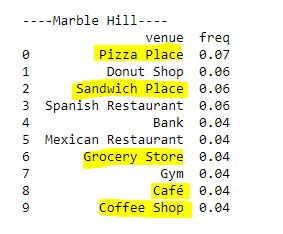

We can expect that the current office location (Marble Hill) will fall into a large cluster.

Let's go back to the previous data and put them into a _pandas_ dataframe. First, let's write a function to sort the venues in descending order.

In [265]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [151]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood     1st Most Common Venue  \
0                                        Agincourt  Mediterranean Restaurant   
1                           Alderwood, Long Branch         Convenience Store   
2  Bathurst Manor, Wilson Heights, Downsview North               Coffee Shop   
3                                  Bayview Village                      Bank   
4                Bedford Park, Lawrence Manor East        Italian Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Skating Rink                Lounge       Badminton Court   
1           Pizza Place           Gas Station            Donut Shop   
2                  Park           Pizza Place                  Bank   
3   Japanese Restaurant         Grocery Store    Chinese Restaurant   
4           Coffee Shop        Sandwich Place             Locksmith   

       5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0  Latin American Restaurant      Sushi Restaurant    Seafood Restaurant   
1               Skating Rink                  Park        Sandwich Place   
2          Mobile Phone Shop           Bridal Shop           Supermarket   
3                       Café          Skating Rink            Playground   
4    Comfort Food Restaurant            Bagel Shop                Bakery   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0           Supermarket        Sandwich Place         Breakfast Spot  
1                   Gym                   Pub            Coffee Shop  
2      Sushi Restaurant         Shopping Mall    Fried Chicken Joint  
3          Intersection               Dog Run       Doner Restaurant  
4                  Bank             Juice Bar       Sushi Restaurant

Let's see our New York place:

In [161]:
neighborhoods_venues_sorted.loc[51]

Neighborhood                     Marble Hill
1st Most Common Venue            Pizza Place
2nd Most Common Venue     Spanish Restaurant
3rd Most Common Venue             Donut Shop
4th Most Common Venue         Sandwich Place
5th Most Common Venue     Mexican Restaurant
6th Most Common Venue            Coffee Shop
7th Most Common Venue                   Café
8th Most Common Venue          Grocery Store
9th Most Common Venue                    Gym
10th Most Common Venue              Pharmacy
Name: 51, dtype: object

### 3.2 Cluster Neighborhoods

We will use k-means clustering. But first we will find the best _K_ value using the **Elbow Point** method.

#### 3.2.1 Elbow Method

In [162]:
# drop "Neighborhood" column from the dataframe
Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)
X = Toronto_grouped_clustering

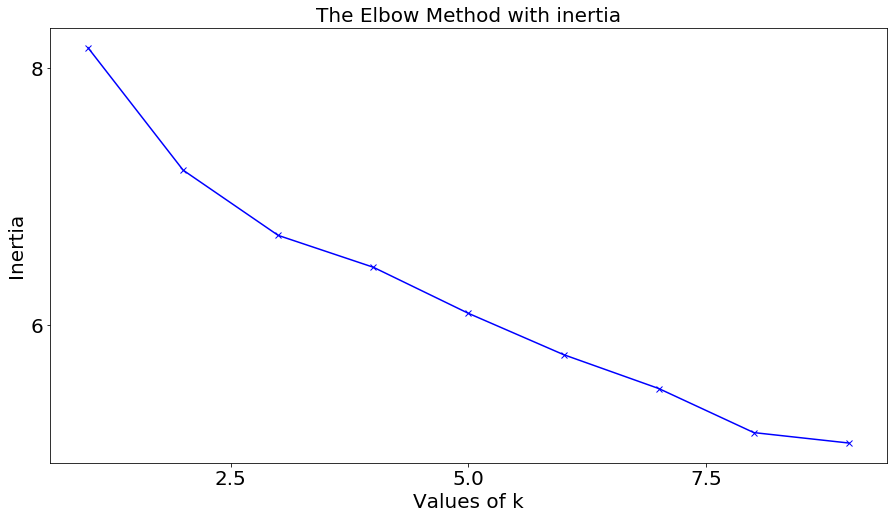

In [186]:
# find 'k' value by Elbow Method
plt.figure(figsize=[15, 8])
inertia=[]
range_val=range(1,10)
for i in range_val:
  kmean=KMeans(n_clusters=i)
  kmean.fit_predict(X)
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-', xunits=[1,2,3,4,5,6,7,8] )
plt.xlabel('Values of k', fontsize = '20') 
plt.ylabel('Inertia', fontsize = '20') 
plt.title('The Elbow Method with inertia', fontsize = '20') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Here, we saw that the optimum K value is 8 so we will have a resulting of 8 clusters.

#### 3.2.2 KMeans

In [217]:
kclusters = 8
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:1000] 

array([0, 3, 3, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 2, 3, 3, 0, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 3, 0, 0, 6, 0, 0, 6, 3, 0, 0, 3, 5, 3, 3, 0, 6, 3,
       0, 3, 0, 6, 0, 0, 3, 0, 3, 0, 0, 6, 3, 6, 0, 0, 6, 0, 0, 3, 6, 0,
       0, 1, 4, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6,
       3, 3, 3, 3, 0, 6, 1, 6, 1, 7])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [218]:
neighborhoods_venues_sorted=neighborhoods_venues_sorted.drop('Cluster Labels',1)

In [219]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = df_Toronto

#merge Toronto_grouped with df_Toronto to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_merged.head() # check the last columns!

Postal Code      Borough                            Neighborhood   Latitude  \
0         M1B  Scarborough                          Malvern, Rouge  43.806686   
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2         M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3         M1G  Scarborough                                  Woburn  43.770992   
4         M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -79.194353             3.0  Fast Food Restaurant                 Trail   
1 -79.160497             0.0        Breakfast Spot          Burger Joint   
2 -79.188711             3.0  Fast Food Restaurant            Restaurant   
3 -79.216917             1.0                  Park           Coffee Shop   
4 -79.239476             0.0           Coffee Shop     Indian Restaurant   

  3rd Most Common Venue 4th Most Common Venue          5th Most Common Venue  \
0                   Spa   Martial Arts School  Paper / Office Supplies Store   
1    Italian Restaurant                   Bar                    Yoga Studio   
2           Pizza Place            Sports Bar                     Beer Store   
3      Business Service   Dumpling Restaurant            Distribution Center   
4           Yoga Studio              Pharmacy                    Flower Shop   

         6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   Hobby Shop           Coffee Shop            Comic Shop   
1  Eastern European Restaurant      Doner Restaurant            Donut Shop   
2                         Bank   Fried Chicken Joint      Greek Restaurant   
3                     Dive Bar               Dog Run      Doner Restaurant   
4                 Burger Joint   Fried Chicken Joint                  Bank   

         9th Most Common Venue 10th Most Common Venue  
0  Eastern European Restaurant                Dog Run  
1                    Drugstore            Dry Cleaner  
2                  Yoga Studio            Dry Cleaner  
3                   Donut Shop              Drugstore  
4                       Bakery        Thai Restaurant

In [220]:
Toronto_merged.to_csv(r'H:\GitHub\Coursera_Capstone\final_reports\data\Toronto_merged.csv', header="True", index=None, sep=';', mode='a')

In [221]:
Toronto_merged.loc[103]

Postal Code                              XXX
Borough                            Manhattan
Neighborhood                     Marble Hill
Latitude                             40.8766
Longitude                           -73.9107
Cluster Labels                             0
1st Most Common Venue            Pizza Place
2nd Most Common Venue     Spanish Restaurant
3rd Most Common Venue             Donut Shop
4th Most Common Venue         Sandwich Place
5th Most Common Venue     Mexican Restaurant
6th Most Common Venue            Coffee Shop
7th Most Common Venue                   Café
8th Most Common Venue          Grocery Store
9th Most Common Venue                    Gym
10th Most Common Venue              Pharmacy
Name: 103, dtype: object

In [222]:
Toronto_merged['Cluster Labels'] = Toronto_merged['Cluster Labels'].fillna(0)


In [223]:
Toronto_merged['Cluster Labels'] = Toronto_merged['Cluster Labels'].astype(int)

#### 3.2.3 Examine Clusters

Finally, let's examine and visualize the cluster where Marble Hill belongs.

In [224]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
1               Rouge Hill, Port Union, Highland Creek               0   
4                                            Cedarbrae               0   
10   Dorset Park, Wexford Heights, Scarborough Town...               0   
12                                           Agincourt               0   
16                                         Upper Rouge               0   
18                        Fairview, Henry Farm, Oriole               0   
19                                     Bayview Village               0   
22                                          Willowdale               0   
24                                          Willowdale               0   
26                                           Don Mills               0   
27                                           Don Mills               0   
29                     Northwood Park, York University               0   
37                                         The Beaches               0   
38                                             Leaside               0   
39                                    Thorncliffe Park               0   
40                                   The Danforth East               0   
41                        The Danforth West, Riverdale               0   
42                      India Bazaar, The Beaches West               0   
43                                     Studio District               0   
45                                    Davisville North               0   
46                                  North Toronto West               0   
47                                          Davisville               0   
49   Summerhill West, Rathnelly, South Hill, Forest...               0   
51                         St. James Town, Cabbagetown               0   
52                                Church and Wellesley               0   
53                           Regent Park, Harbourfront               0   
54                            Garden District, Ryerson               0   
55                                      St. James Town               0   
56                                         Berczy Park               0   
57                                  Central Bay Street               0   
58                            Richmond, Adelaide, King               0   
59   Harbourfront East, Union Station, Toronto Islands               0   
60            Toronto Dominion Centre, Design Exchange               0   
61                      Commerce Court, Victoria Hotel               0   
62                   Bedford Park, Lawrence Manor East               0   
65                 The Annex, North Midtown, Yorkville               0   
66                      University of Toronto, Harbord               0   
67           Kensington Market, Chinatown, Grange Park               0   
68   CN Tower, King and Spadina, Railway Lands, Har...               0   
69                                    Downtown Toronto               0   
70              First Canadian Place, Underground city               0   
71                    Lawrence Manor, Lawrence Heights               0   
72                                           Glencairn               0   
75                                            Christie               0   
76                        Dufferin, Dovercourt Village               0   
77                            Little Portugal, Trinity               0   
78        Brockton, Parkdale Village, Exhibition Place               0   
82                       High Park, The Junction South               0   
83                              Parkdale, Roncesvalles               0   
84                                  Runnymede, Swansea               0   
85                       Ontario Provincial Government               0   
86                                         Mississauga               0   
87                                        East Toronto               0   
90       The Kingsway, Montgomery Road, Old Mi

In [225]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
3            Woburn               1                  Park   
23  York Mills West               1                  Park   
50         Rosedale               1                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
3            Coffee Shop      Business Service   Dumpling Restaurant   
23     Convenience Store          Intersection   Dumpling Restaurant   
50                 Trail           Candy Store            Playground   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3    Distribution Center              Dive Bar               Dog Run   
23   Distribution Center              Dive Bar               Dog Run   
50           Dry Cleaner   Distribution Center              Dive Bar   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
3       Doner Restaurant            Donut Shop              Drugstore  
23      Doner Restaurant            Donut Shop              Drugstore  
50               Dog Run      Doner Restaurant             Donut Shop

In [226]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
102  Clairville, Humberwood, Woodbine Downs, West H...               2   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
102   Rental Car Location             Drugstore           Yoga Studio   

           4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
102  Eastern European Restaurant   Distribution Center              Dive Bar   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
102               Dog Run      Doner Restaurant            Donut Shop   

    10th Most Common Venue  
102            Dry Cleaner

In [227]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
0                                       Malvern, Rouge               3   
2                    Guildwood, Morningside, West Hill               3   
5                                  Scarborough Village               3   
6          Kennedy Park, Ionview, East Birchmount Park               3   
8      Cliffside, Cliffcrest, Scarborough Village West               3   
11                                   Wexford, Maryvale               3   
13             Clarks Corners, Tam O'Shanter, Sullivan               3   
14   Milliken, Agincourt North, Steeles East, L'Amo...               3   
15                       Steeles West, L'Amoreaux West               3   
17                                   Hillcrest Village               3   
28     Bathurst Manor, Wilson Heights, Downsview North               3   
30                                           Downsview               3   
31                                           Downsview               3   
32                                           Downsview               3   
33                                           Downsview               3   
35                     Parkview Hill, Woodbine Gardens               3   
73                                  Humewood-Cedarvale               3   
80    Del Ray, Mount Dennis, Keelsdale and Silverthorn               3   
81                       Runnymede, The Junction North               3   
88        New Toronto, Mimico South, Humber Bay Shores               3   
89                              Alderwood, Long Branch               3   
94   West Deane Park, Princess Gardens, Martin Grov...               3   
95   Eringate, Bloordale Gardens, Old Burnhamthorpe...               3   
97                                    Humberlea, Emery               3   
98                                              Weston               3   
99                                           Westmount               3   
100  Kingsview Village, St. Phillips, Martin Grove ...               3   
101  South Steeles, Silverstone, Humbergate, Jamest...               3   

         1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
0         Fast Food Restaurant                  Trail                   Spa   
2         Fast Food Restaurant             Restaurant           Pizza Place   
5               Ice Cream Shop   Fast Food Restaurant            Restaurant   
6                  Coffee Shop      Convenience Store   Rental Car Location   
8                  Wings Joint            Auto Garage            Restaurant   
11                 Pizza Place           Burger Joint          Intersection   
13        Fast Food Restaurant            Pizza Place     Convenience Store   
14        Fast Food Restaurant            Pizza Place          Intersection   
15        Fast Food Restaurant            Coffee Shop           Pizza Place   
17        Fast Food Restaurant         Ice Cream Shop                Bakery   
28                 Coffee Shop                   Park           Pizza Place   
30                 Coffee Shop  Vietnamese Restaurant         Grocery Store   
31                 Coffee Shop  Vietnamese Restaurant         Grocery Store   
32                 Coffee Shop  Vietnamese Restaurant         Grocery Store   
33                 Coffee Shop  Vietnamese Restaurant         Grocery Store   
35                 Pizza Place           Home Service           Flea Market   
73                        Park          Grocery Store     Korean Restaurant   
80                        Park      Convenience Store          Dessert Shop   
81                     Brewery            Coffee Shop           Pizza Place   
88                        Café     Mexican Restaurant              Pharmacy   
89           Convenience Store            Pizza Place           Gas Station   
94                 Pizza Place                    Gym    Mexican Restaurant   
95                        Café            Pizza Place           Gas Station   

In [228]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4, Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
63     Roselawn               4            Playground                Garden   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
63    Photography Studio   Dumpling Restaurant              Dive Bar   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
63               Dog Run      Doner Restaurant            Donut Shop   

   9th Most Common Venue 10th Most Common Venue  
63             Drugstore            Dry Cleaner

In [229]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 5, Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
96  Humber Summit               5                Bakery          Home Service   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
96           Pizza Place              Dive Bar               Dog Run   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
96      Doner Restaurant            Donut Shop             Drugstore   

   9th Most Common Venue 10th Most Common Venue  
96           Dry Cleaner    Dumpling Restaurant

In [230]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 6, Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
7                     Golden Mile, Clairlea, Oakridge               6   
9                         Birch Cliff, Cliffside West               6   
21                            Willowdale, Newtonbrook               6   
25                                          Parkwoods               6   
34                                   Victoria Village               6   
36                                   Woodbine Heights               6   
44                                      Lawrence Park               6   
48                        Moore Park, Summerhill East               6   
64                           Forest Hill North & West               6   
74                                Caledonia-Fairbanks               6   
79           North Park, Maple Leaf Park, Upwood Park               6   
91  Old Mill South, King's Mill Park, Sunnylea, Hu...               6   
93                                   Islington Avenue               6   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
7           Intersection                Bakery           Coffee Shop   
9                   Park       College Stadium       Thai Restaurant   
21                  Park     Indian Restaurant           Coffee Shop   
25              Bus Stop                  Park     Food & Drink Shop   
34                  Park          Intersection          Hockey Arena   
36          Skating Rink           Curling Ice              Bus Line   
44                  Park           Coffee Shop              Bus Line   
48                  Park         Grocery Store       Thai Restaurant   
64              Bus Line         Jewelry Store      Sushi Restaurant   
74                  Park          Intersection                Bakery   
79      Business Service            Playground          Tennis Court   
91  Gym / Fitness Center                  Park            Playground   
93              Pharmacy         Shopping Mall          Skating Rink   

    4th Most Common Venue        5th Most Common Venue 6th Most Common Venue  \
7                Bus Line                  Bus Station                  Park   
9   General Entertainment                         Café          Skating Rink   
21       Sushi Restaurant                  Pizza Place                  Bank   
25           Intersection          Dumpling Restaurant              Dive Bar   
34  Portuguese Restaurant                  Coffee Shop   Sporting Goods Shop   
36             Beer Store                         Park           Video Store   
44            Swim School            Electronics Store      Business Service   
48           Tennis Court                         Café           Candy Store   
64                  Trail                  Dry Cleaner           Yoga Studio   
74          Women's Store           Mexican Restaurant   Sporting Goods Shop   
79                  Trail                       Bakery      Basketball Court   
91         Baseball Field  Eastern European Restaurant               Dog Run   
93                   Café                         Park            Playground   

   7th Most Common Venue 8th Most Common Venue        9th Most Common Venue  \
7      Convenience Store         Metro Station               Ice Cream Shop   
9                  Diner     Electronics Store  Eastern European Restaurant   
21        Sandwich Place                 Trail                  Dry Cleaner   
25               Dog Run      Doner Restaurant                   Donut Shop   
34            Playground     French Restaurant          Distribution Center   
36            Restaurant              Bus Stop                 Intersection   
44           Yoga Studio           Dry Cleaner                     Dive Bar   
48        Sandwich Place  Gym / Fitness Center                          Gym   
64   Dumpling Restaurant               Dog Run             Doner Restaurant   
74                  Bank            Beer Store                          Gym   
79         Garden C

In [231]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 7, Toronto_merged.columns[[2] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
20  York Mills, Silver Hills               7                  Park   

   2nd Most Common Venue        3rd Most Common Venue 4th Most Common Venue  \
20                  Pool  Eastern European Restaurant   Distribution Center   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
20              Dive Bar               Dog Run      Doner Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
20            Donut Shop             Drugstore            Dry Cleaner

In [233]:
df_Final_map = pd.DataFrame(Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0])

In [234]:
Toronto_merged.shape

(104, 16)

In [235]:
df_Final_map.shape

(56, 16)

In [236]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Final_map['Latitude'], df_Final_map['Longitude'], df_Final_map['Neighborhood'], df_Final_map['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's zoom on New York:

In [237]:
# create map
map_clusters = folium.Map(location=[40.876551, -73.910660], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Final_map['Latitude'], df_Final_map['Longitude'], df_Final_map['Neighborhood'], df_Final_map['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Results and Discussion 


There is a great number of locations in Toronto which are similar to Marble Hill if we take avaibality of venues only (56 places). It seems that there are too many locations to make an unambiguous decision. In the next step, I would suggest the client to choose important venues for him or add other factors that would lead to a shortlist.
   
My analysis shows that elbow methody was not clear in this case. Certainly, it would be useful to analyze the number of clusters once again with different method. Although I chose 8 clusters as k, from **The Elbow Method with inertia** plot both k = 3 and k = 8 formed the elbow. It is possible that other techniques for finding k would have worked better.
    
The analysis also shows that the venue itself does not constitute an unequivocal decision as to whether a given venue is similar to the current office location. Usually, in the vicinity of offices, there are the same attractions - so taking only them into account may not be a good location filter. There is no doubt that other factors that I mention in the next point should be taken into account.
    


## 5. Conclusion 


Purpose of this paper was to identify Toronto's areas which are simmilar to New York location - Marble Hill in order to aid stakeholders in finding an optimal location for a new office. By joining Toronto and New York location and clustering them I choosed those locations which are quite simillar to the office actuall location in terms of avaiable venues. 

Final decission on optimal office location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), traffic, public transport, cost of the rented space, space availability, social and economic dynamics of every neighborhood, neighborhood safety etc.

The analysis performed may be the first step in the further search for the best place, depending on stakeholders decision.


## References

<p><a id=1>[1] https://en.wikipedia.org/wiki/New_York_City </a></p>
<p><a id=2>[2] https://en.wikipedia.org/wiki/Toronto </a></p>
<p><a id=3>[3] https://www.quora.com/How-different-or-similar-is-Toronto-to-New-York-City </a></p>
<p><a id=4>[4] https://nomadlist.com/north-america</a></p>